In [88]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import forestci as fci
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



In [89]:
## The file is opened as a Dataframe 
df = p.read_csv('/Users/vispikarkaria/Downloads/share_data_withFEA_metrics.csv')
df = df.dropna()


In [90]:
##FleetID is transformed

FleetID_transformation = np.unique(df['FleetID'])
FleetID_transformation


gle = LabelEncoder()
FleetID_labels = gle.fit_transform(df['FleetID'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

genre_mappings

df['FleetID_code'] = FleetID_labels
print(genre_mappings)

{0: '10101', 1: '10109', 2: '10112', 3: '10114', 4: '10120', 5: '10150', 6: '10151', 7: '10153', 8: '10155', 9: '10157', 10: '12005', 11: '20004', 12: '20006', 13: '20007', 14: '20019', 15: '30100', 16: '30101', 17: '30105', 18: '30241', 19: '30253', 20: '30257', 21: '30258', 22: '30301', 23: '35278', 24: '35308', 25: '35313', 26: '35404', 27: '35404_OLD', 28: '45390'}


In [91]:
##WheelPosition is transformed

WheelPosition_transformation = np.unique(df['WheelPosition'])
WheelPosition_transformation


gle = LabelEncoder()
WheelPosition_labels = gle.fit_transform(df['WheelPosition'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

genre_mappings

df['WheelPosition_code'] = WheelPosition_labels
print(genre_mappings)

{0: '1L', 1: '1R', 2: '2LI', 3: '2LO', 4: '2RI', 5: '2RO', 6: '3LI', 7: '3LO', 8: '3RI', 9: '3RO', 10: '4LI', 11: '4LO', 12: '4RI', 13: '4RO', 14: '5LI', 15: '5LO', 16: '5RI', 17: '5RO'}


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
19343


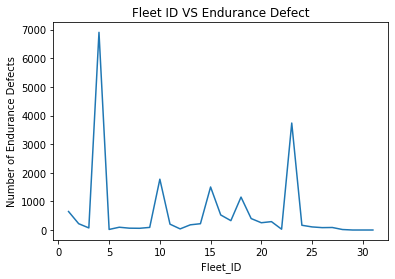

In [92]:
##Analyzing Number of Endurance defect in each fleet

MyList = df["FleetID_code"]
MyList = MyList.to_numpy()
print(np.unique(MyList))

x_array = []
y_array= []

for i in range(1,32):
    x_array.append(i)
    count1 = np.count_nonzero(MyList == i) 
    count1 = y_array.append(count1)

##Plotting Fleet ID code vs the endurance defect
plt.plot(x_array, y_array)
plt.xlabel("Fleet_ID")
plt.ylabel("Number of Endurance Defects")
plt.title("Fleet ID VS Endurance Defect")
print(len(df))

In [93]:
## Creating the train test spit in this code
X = df[['Casing_Mileage', 'Casing_Age_Days', 'td_avg', 'NC_sidewall_CVMD_AMP_mean', 'NC_summit_CVMD_AMP_mean', 'NC_ZB_CVMD_AMP_mean', 'NC_turn_CVMD_AMP_mean', 'NC_summit_maxCVMD_rev_mean', 'NC_sidewall_maxCVMD_rev_mean', 'NC_turn_maxCVMD_rev_mean', 'NC_ZB_maxCVMD_rev_mean', 'D07_SEelm_cumul', 'NC_sidewall_SEelm_cumul', 'NC_summit_SEelm_cumul', 'NC_ZB_SEelm_cumul', 'BT_SEelm_cumul', 'PS_SEelm_cumul', 'BJ_SEelm_cumul', 'BR_SEelm_cumul', 'temp_Q_cumul']]
y = df['End_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [94]:
## Combine train and test dataset

df2 = pd.concat([X_train, y_train], axis=1)
df3 = pd.concat([X_test, y_test], axis=1)
print(len(df2), len(df3))


13540 5803


In [95]:
# Balancing the train dataset

print("The length of dataframe before concat is ", len(df2))

def select_balancing_method(df2, method, number_drop):
    increase_minority = 'increase_minority'
    if method == 'increase_minority':
        duplicate_y = df2[df2['End_Flag']==1]
        for i in range(0,10):
            df2 = pd.concat([df2, duplicate_y], )
        print("The length of dataframe after concat is ", len(df2))

    elif method == 'decrease_majority': 
        duplicate_y = df2[df2['End_Flag']==0]
        index_list = df2.index[ df2['End_Flag'] == 0]
        #number_drop = int(input("Please enter the number of rows you want to delete: "))
        df2.drop(index_list[500:number_drop],0, inplace=True)
        df2.head()
        print("The length of dataframe after concat is ", len(df2))
    return df2

df2 = select_balancing_method(df2, method = 'decrease_majority', number_drop = 13000)

X_train = df2[['Casing_Mileage', 'Casing_Age_Days', 'td_avg', 'NC_sidewall_CVMD_AMP_mean', 'NC_summit_CVMD_AMP_mean', 'NC_ZB_CVMD_AMP_mean', 'NC_turn_CVMD_AMP_mean', 'NC_summit_maxCVMD_rev_mean', 'NC_sidewall_maxCVMD_rev_mean', 'NC_turn_maxCVMD_rev_mean', 'NC_ZB_maxCVMD_rev_mean', 'D07_SEelm_cumul', 'NC_sidewall_SEelm_cumul', 'NC_summit_SEelm_cumul', 'NC_ZB_SEelm_cumul', 'BT_SEelm_cumul', 'PS_SEelm_cumul', 'BJ_SEelm_cumul', 'BR_SEelm_cumul', 'temp_Q_cumul']]
y_train = df2['End_Flag']

The length of dataframe before concat is  13540
The length of dataframe after concat is  1040


In [96]:
## Running the Random forest model
clf = RandomForestClassifier(n_estimators = 500, criterion='entropy',
                                  random_state=10)

clf.fit(X_train, y_train)
print(len(X_train), len(X_test))
y_pred = clf.predict(X_test)

1040 5803


Accuracy: 0.8690332586593141
F1_score: 0.11007025761124122


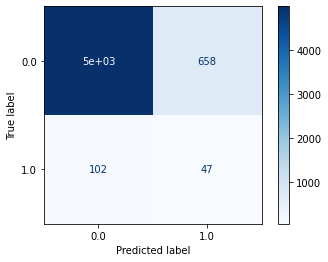

In [97]:
## Checking the metrics of Random Forest
##printing the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))

#Printing the confusion matrix
disp = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap="Blues", values_format='.3g')
